In [9]:

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime


# Import API key
import api_keys


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "city_data.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [10]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)




662

## Perform API Calls

In [11]:

# OpenWeatherMap API Key
api_key = "9674846c0888300a6cccf20e23c3b46c"



# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "metric"



#List of City data
lat = []
lon=[]
temp=[]
humidity=[] 
cloudy =[]
windspeed=[]
count=0
cityname=[]
dt=[]


query_url = f"{url}&units={units}&q="
query_url + city
response = requests.get(query_url + city).json()
response



# loop through cities, make API request, and append desired results

    
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        #print(f"{response}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        dt.append(response['dt'])
        count=count+1
        
        #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
            
    
#print(f"Longitude: {lat}")
print(f"lat: {lat} {len(lat)}")
print(f"lon: {lon} {len(lon)}")
print(f"temp: {temp} {len(temp)}")
print(f"humidity: {humidity} {len(humidity)}")
print(f"clouds: {cloudy} {len(cloudy)}")
print(f"wind speed: {windspeed} {len(windspeed)}")
print(f"date: {dt} {len(dt)}")
print(f"cityname: {cityname} {len(cityname)}")




City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [12]:
# Build a Dataframe 

weather_data = {"city":cityname,"latitude":lat,"longitude":lon,"date":dt,"temperature": temp,"humidity":humidity,"cloudiness":cloudy,"windspeed":windspeed}
weather_data = pd.DataFrame(weather_data)
weather_data.to_csv(output_data_file)
weather_data.head()




,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
0,Tilichiki,60.47,166.10,1573366170,30.40,96,100,11.77
1,Cabo San Lucas,22.89,-109.91,1573366406,74.68,60,20,5.82
2,Vaitape,-16.52,-151.75,1573366434,77.70,83,100,11.72
3,Cordoba,-27.78,-67.24,1573366434,73.38,57,9,4.12
4,Rikitea,-23.12,-134.97,1573366142,73.85,72,97,13.06


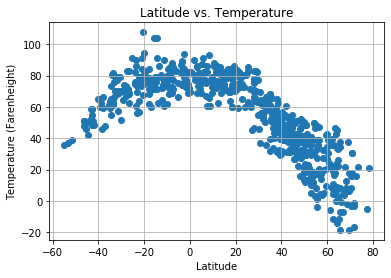

In [13]:
# Latitude vs. Temperature Plot

plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Farenheight)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempInWorldCities.png")

# Show plot
plt.show()

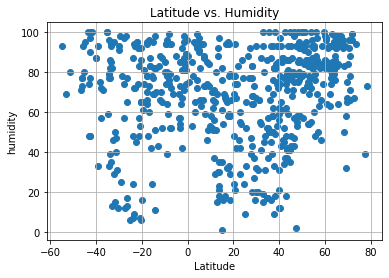

In [14]:
# Latitude vs. Humidity Plot

plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

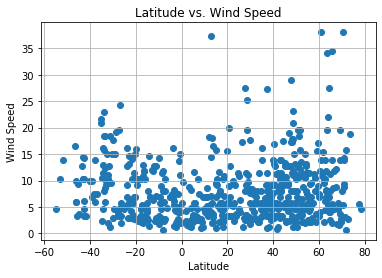

In [15]:
# Latitude vs. Wind Speed Plot

plt.scatter(weather_data["latitude"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

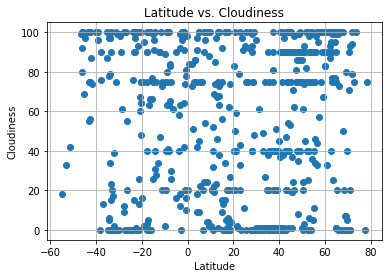

In [16]:
# Latitude vs. Cloudiness Plot

plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()